In [34]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

In [59]:
# creating 3 columns with 2000 rows
x_data = np.random.randn(2000, 3)

In [60]:
x_data.shape

(2000, 3)

In [61]:
w = np.array([0, 0.1, 0.2])

In [62]:
b = 0.2

In [63]:
noise = np.random.randn(1, 2000)*0.1

In [64]:
x_data

array([[-0.09992184, -0.49860656, -1.49075951],
       [ 0.97501969,  0.02253995,  0.95377836],
       [-1.17040844, -0.28069409, -0.28387704],
       ..., 
       [ 1.84933085, -0.94179293, -1.6044256 ],
       [-2.39649472,  0.10059792,  1.7521152 ],
       [-1.04320489,  0.15115267,  1.50509974]])

In [65]:
x_data.T.shape

(3, 2000)

In [66]:
w.shape

(3,)

In [67]:
# target
y_true = np.matmul(w, x_data.T) + b + noise

In [71]:
y_true = y_true[0]

In [72]:
y_true.shape

(2000,)

In [73]:
x_data.shape

(2000, 3)

In [74]:
x_data

array([[-0.09992184, -0.49860656, -1.49075951],
       [ 0.97501969,  0.02253995,  0.95377836],
       [-1.17040844, -0.28069409, -0.28387704],
       ..., 
       [ 1.84933085, -0.94179293, -1.6044256 ],
       [-2.39649472,  0.10059792,  1.7521152 ],
       [-1.04320489,  0.15115267,  1.50509974]])

In [46]:
new_graph = tf.Graph()

In [75]:
with new_graph.as_default():
    x = tf.placeholder(tf.float32, shape=(None, 3))
    y = tf.placeholder(tf.float32, shape=(None))
    
    with tf.name_scope('operation') as scope:
        w = tf.Variable(tf.zeros([1, 3], dtype=tf.float32), name='weight')  # here we are not defining weights because this is problem of regression
                                                                           # and we dont have output class
#         tf.zeros([3])    if we have done this then it means we have 3 columns and 1 row i.e (3, 1) and that will not be compactible with
#                          matrix multiplication with shape of (batch, 3).
        
        b = tf.Variable([0.], name='bias')  # all variable should have same type i.e w, x, and b so I have put [0.]
        y_pred = tf.matmul(w, tf.transpose(x)) + b    # dont change the order of multiplocation in matrix as Wx != xW
        
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        epoch = 10
        errors = []
        for i in range(epoch):
            feed_dict = {x:x_data, y:y_true}
            sess.run(train, feed_dict)
            error = sess.run(loss, feed_dict)
            errors.append(error)
            n_weight =  sess.run(w, feed_dict)
            n_bias = sess.run(b, feed_dict)
#             if i%5 == 0 :
#                 print('epoch:', i, '\nweight:\n', sess.run(w, feed_dict), '\nbias:', sess.run(b, feed_dict))
#                 print('\n\n')

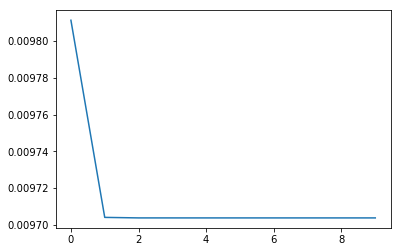

In [76]:
plt.plot(errors)
plt.show()

In [77]:
n_bias

array([ 0.19737858], dtype=float32)

In [78]:
n_weight

array([[ 0.00189051,  0.0987734 ,  0.20017035]], dtype=float32)

In [79]:
with new_graph.as_default():
    with tf.Session() as sess:
        sess.run(init)
        pred = sess.run(y_pred, feed_dict)

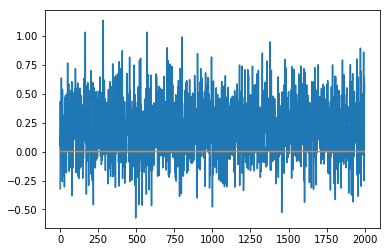

In [96]:
plt.plot(y_true.T)
plt.plot(pred.T)
plt.show()